In [85]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime
from utils import normalize_dataframe
from utils import count_numbers_in_column

In [86]:
os.getcwd()

'c:\\Users\\jarai\\Desktop\\Python_work\\TheBridge\\Alumno\\Javier_Araiz_TheBridge\\EDA_Project'

In [87]:
owners = pd.read_csv("./Datasets/US_FleetBeneficialOwners.csv")
owners

Year  FlagOfRegistration FlagOfRegistration Label BeneficialOwnership  \
0      2014                   0          Total all flags                0000   
1      2014                   0          Total all flags               0000u   
2      2014                   0          Total all flags                 008   
3      2014                   0          Total all flags                 012   
4      2014                   0          Total all flags                 016   
...     ...                 ...                      ...                 ...   
57766  2020                 833              Isle of Man                 862   
57767  2020                 833              Isle of Man                 876   
57768  2020                 833              Isle of Man                 882   
57769  2020                 833              Isle of Man                 887   
57770  2020                 833              Isle of Man                 926   

            BeneficialOwnership Label  Dead weight tons in thousands  \
0                               World                    1677345.179   
1                        World n.e.s.                       5498.359   
2                             Albania                         87.149   
3                             Algeria                       1380.595   
4                      American Samoa                          0.000   
...                               ...                            ...   
57766  Venezuela (Bolivarian Rep. of)                          0.000   
57767       Wallis and Futuna Islands                          0.000   
57768                           Samoa                          0.000   
57769                           Yemen                          0.000   
57770                  United Kingdom                       1979.623   

       Dead weight tons in thousands Footnote  Percentage of total fleet  \
0                                         NaN                  100.00000   
1                                         NaN                    0.32780   
2                                         NaN                    0.00520   
3                                         NaN                    0.08231   
4                                         NaN                    0.00000   
...                                       ...                        ...   
57766                                     NaN                    0.00000   
57767                                     NaN                    0.00000   
57768                                     NaN                    0.00000   
57769                                     NaN                    0.00000   
57770                                     NaN                    8.20503   

       Percentage of total fleet Footnote  Number of ships  \
0                                     NaN            47497   
1                                     NaN              624   
2                                     NaN               22   
3                                     NaN               45   
4                                     NaN                0   
...                                   ...              ...   
57766                                 NaN                0   
57767                                 NaN                0   
57768                                 NaN                0   
57769                                 NaN                0   
57770                                 NaN               68   

       Number of ships Footnote  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
...                         ...  
57766                       NaN  
57767                       NaN  
57768                       NaN  
57769                       NaN  
57770                       NaN  

[57771 rows x 11 columns]

In [88]:
owners.isna().sum()

Year                                          0
FlagOfRegistration                            0
FlagOfRegistration Label                      0
BeneficialOwnership                           0
BeneficialOwnership Label                     0
Dead weight tons in thousands                 0
Dead weight tons in thousands Footnote    57771
Percentage of total fleet                     0
Percentage of total fleet Footnote        57771
Number of ships                               0
Number of ships Footnote                  57771
dtype: int64

In [89]:
owners = owners.drop(owners[['Dead weight tons in thousands Footnote', 'Percentage of total fleet Footnote', 'Number of ships Footnote']], axis= 1)

In [90]:
owners

Year  FlagOfRegistration FlagOfRegistration Label BeneficialOwnership  \
0      2014                   0          Total all flags                0000   
1      2014                   0          Total all flags               0000u   
2      2014                   0          Total all flags                 008   
3      2014                   0          Total all flags                 012   
4      2014                   0          Total all flags                 016   
...     ...                 ...                      ...                 ...   
57766  2020                 833              Isle of Man                 862   
57767  2020                 833              Isle of Man                 876   
57768  2020                 833              Isle of Man                 882   
57769  2020                 833              Isle of Man                 887   
57770  2020                 833              Isle of Man                 926   

            BeneficialOwnership Label  Dead weight tons in thousands  \
0                               World                    1677345.179   
1                        World n.e.s.                       5498.359   
2                             Albania                         87.149   
3                             Algeria                       1380.595   
4                      American Samoa                          0.000   
...                               ...                            ...   
57766  Venezuela (Bolivarian Rep. of)                          0.000   
57767       Wallis and Futuna Islands                          0.000   
57768                           Samoa                          0.000   
57769                           Yemen                          0.000   
57770                  United Kingdom                       1979.623   

       Percentage of total fleet  Number of ships  
0                      100.00000            47497  
1                        0.32780              624  
2                        0.00520               22  
3                        0.08231               45  
4                        0.00000                0  
...                          ...              ...  
57766                    0.00000                0  
57767                    0.00000                0  
57768                    0.00000                0  
57769                    0.00000                0  
57770                    8.20503               68  

[57771 rows x 8 columns]

In [91]:
owners.to_csv('./Cleaned_Data/cleaned_owners.csv')

In [92]:
fleet = pd.read_csv("./Datasets/US_MerchantFleet.csv")
fleet

Year Economy   Economy Label  ShipType        ShipType Label  \
0      1980    0000           World         0           Total fleet   
1      1980    0000           World         1           Oil tankers   
2      1980    0000           World         2         Bulk carriers   
3      1980    0000           World         3         General cargo   
4      1980    0000           World         4       Container ships   
...     ...     ...             ...       ...                   ...   
79868  2020     926  United Kingdom         1           Oil tankers   
79869  2020     926  United Kingdom         2         Bulk carriers   
79870  2020     926  United Kingdom         3         General cargo   
79871  2020     926  United Kingdom         4       Container ships   
79872  2020     926  United Kingdom         5  Other types of ships   

       Dead weight tons in thousands  Dead weight tons in thousands Footnote  \
0                         672142.488                                     NaN   
1                         337895.557                                     NaN   
2                         181880.282                                     NaN   
3                         112840.897                                     NaN   
4                          10290.114                                     NaN   
...                              ...                                     ...   
79868                       6537.655                                     NaN   
79869                      18563.805                                     NaN   
79870                        921.849                                     NaN   
79871                       4230.842                                     NaN   
79872                       5940.901                                     NaN   

       Percentage of total world  Percentage of total world Footnote  \
0                     100.000000                                 NaN   
1                     100.000000                                 NaN   
2                     100.000000                                 NaN   
3                     100.000000                                 NaN   
4                     100.000000                                 NaN   
...                          ...                                 ...   
79868                   1.086812                                 NaN   
79869                   2.111130                                 NaN   
79870                   1.210736                                 NaN   
79871                   1.539291                                 NaN   
79872                   2.505656                                 NaN   

       Percentage of total fleet  Percentage of total fleet Footnote  \
0                      100.00000                                 NaN   
1                       50.27142                                 NaN   
2                       27.05978                                 NaN   
3                       16.78824                                 NaN   
4                        1.53094                                 NaN   
...                          ...                                 ...   
79868                   18.06229                                 NaN   
79869                   51.28824                                 NaN   
79870                    2.54689                                 NaN   
79871                   11.68901                                 NaN   
79872                   16.41357                                 NaN   

       Number of ships  Number of ships Footnote  Gross Tonnage in thousands  \
0                  NaN                       NaN                         NaN   
1                  NaN                       NaN                         NaN   
2                  NaN                       NaN                         NaN   
3                  NaN                       NaN                         NaN   
4                  NaN                       NaN               

In [93]:
fleet.isna().sum()

Year                                          0
Economy                                       0
Economy Label                                 0
ShipType                                      0
ShipType Label                                0
Dead weight tons in thousands                 0
Dead weight tons in thousands Footnote    79873
Percentage of total world                     0
Percentage of total world Footnote        79873
Percentage of total fleet                     0
Percentage of total fleet Footnote        79873
Number of ships                           56857
Number of ships Footnote                  79873
Gross Tonnage in thousands                56857
Gross Tonnage in thousands Footnote       79873
dtype: int64

In [94]:
fleet = fleet.drop(fleet[['Dead weight tons in thousands Footnote', 'Percentage of total world Footnote', 'Percentage of total fleet Footnote', 'Number of ships Footnote', 'Gross Tonnage in thousands', 'Gross Tonnage in thousands Footnote']], axis= 1)

In [96]:
fleet

Year Economy   Economy Label  ShipType        ShipType Label  \
0      1980    0000           World         0           Total fleet   
1      1980    0000           World         1           Oil tankers   
2      1980    0000           World         2         Bulk carriers   
3      1980    0000           World         3         General cargo   
4      1980    0000           World         4       Container ships   
...     ...     ...             ...       ...                   ...   
79868  2020     926  United Kingdom         1           Oil tankers   
79869  2020     926  United Kingdom         2         Bulk carriers   
79870  2020     926  United Kingdom         3         General cargo   
79871  2020     926  United Kingdom         4       Container ships   
79872  2020     926  United Kingdom         5  Other types of ships   

       Dead weight tons in thousands  Percentage of total world  \
0                         672142.488                 100.000000   
1                         337895.557                 100.000000   
2                         181880.282                 100.000000   
3                         112840.897                 100.000000   
4                          10290.114                 100.000000   
...                              ...                        ...   
79868                       6537.655                   1.086812   
79869                      18563.805                   2.111130   
79870                        921.849                   1.210736   
79871                       4230.842                   1.539291   
79872                       5940.901                   2.505656   

       Percentage of total fleet  Number of ships  
0                      100.00000              NaN  
1                       50.27142              NaN  
2                       27.05978              NaN  
3                       16.78824              NaN  
4                        1.53094              NaN  
...                          ...              ...  
79868                   18.06229             99.0  
79869                   51.28824            147.0  
79870                    2.54689            116.0  
79871                   11.68901             59.0  
79872                   16.41357            883.0  

[79873 rows x 9 columns]

In [97]:
fleet.to_csv('./Cleaned_Data/cleaned_fleet.csv')

In [13]:
Ship_buildings = pd.read_csv("./Datasets/US_ShipBuilding.csv")
Ship_buildings

Year  Series                       Series Label Country  \
0     2014    2306  Ship building by country of built    0000   
1     2014    2306  Ship building by country of built   0000u   
2     2014    2306  Ship building by country of built     031   
3     2014    2306  Ship building by country of built     032   
4     2014    2306  Ship building by country of built     036   
...    ...     ...                                ...     ...   
1309  2019    2306  Ship building by country of built     792   
1310  2019    2306  Ship building by country of built     804   
1311  2019    2306  Ship building by country of built     818   
1312  2019    2306  Ship building by country of built     842   
1313  2019    2306  Ship building by country of built     926   

                 Country Label  ShipType ShipType Label  \
0                        World         0    Total fleet   
1                 World n.e.s.         0    Total fleet   
2                   Azerbaijan         0    Total fleet   
3                    Argentina         0    Total fleet   
4                    Australia         0    Total fleet   
...                        ...       ...            ...   
1309                    Turkey         0    Total fleet   
1310                   Ukraine         0    Total fleet   
1311                     Egypt         0    Total fleet   
1312  United States of America         0    Total fleet   
1313            United Kingdom         0    Total fleet   

      Percentage of total all economies  \
0                             100.00000   
1                               0.01340   
2                               0.00000   
3                               0.00000   
4                               0.00353   
...                                 ...   
1309                            0.22292   
1310                            0.00151   
1311                            0.00217   
1312                            0.19938   
1313                            0.00306   

     Percentage of total all economies Footnote  Gross Tonnage  \
0                                           NaN       63662235   
1                                           NaN           8528   
2                                           NaN              0   
3                                           NaN              0   
4                                           NaN           2245   
...                                         ...            ...   
1309                                        NaN         146931   
1310                                        NaN            994   
1311                                        NaN           1431   
1312                                        NaN         131415   
1313                                        NaN           2014   

     Gross Tonnage Footnote  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
1309                    NaN  
1310                    NaN  
1311                    NaN  
1312                    NaN  
1313                    NaN  

[1314 rows x 11 columns]

In [14]:
Ship_buildings.isna().sum()

Year                                             0
Series                                           0
Series Label                                     0
Country                                          0
Country Label                                    0
ShipType                                         0
ShipType Label                                   0
Percentage of total all economies                0
Percentage of total all economies Footnote    1313
Gross Tonnage                                    0
Gross Tonnage Footnote                        1313
dtype: int64

In [15]:
Ship_buildings = Ship_buildings.drop(Ship_buildings[['Percentage of total all economies Footnote', 'Gross Tonnage Footnote']], axis= 1)
Ship_buildings

Year  Series                       Series Label Country  \
0     2014    2306  Ship building by country of built    0000   
1     2014    2306  Ship building by country of built   0000u   
2     2014    2306  Ship building by country of built     031   
3     2014    2306  Ship building by country of built     032   
4     2014    2306  Ship building by country of built     036   
...    ...     ...                                ...     ...   
1309  2019    2306  Ship building by country of built     792   
1310  2019    2306  Ship building by country of built     804   
1311  2019    2306  Ship building by country of built     818   
1312  2019    2306  Ship building by country of built     842   
1313  2019    2306  Ship building by country of built     926   

                 Country Label  ShipType ShipType Label  \
0                        World         0    Total fleet   
1                 World n.e.s.         0    Total fleet   
2                   Azerbaijan         0    Total fleet   
3                    Argentina         0    Total fleet   
4                    Australia         0    Total fleet   
...                        ...       ...            ...   
1309                    Turkey         0    Total fleet   
1310                   Ukraine         0    Total fleet   
1311                     Egypt         0    Total fleet   
1312  United States of America         0    Total fleet   
1313            United Kingdom         0    Total fleet   

      Percentage of total all economies  Gross Tonnage  
0                             100.00000       63662235  
1                               0.01340           8528  
2                               0.00000              0  
3                               0.00000              0  
4                               0.00353           2245  
...                                 ...            ...  
1309                            0.22292         146931  
1310                            0.00151            994  
1311                            0.00217           1431  
1312                            0.19938         131415  
1313                            0.00306           2014  

[1314 rows x 9 columns]

In [16]:
Ship_buildings.to_csv('./Cleaned_Data/cleaned_ship_buildings.csv')

In [17]:
Ship_scrapping = pd.read_csv("./Datasets/US_ShipScrapping.csv")
Ship_scrapping

Year  Series                              Series Label Country  \
0    2017    2307  Ship scrapping by country of destruction    0000   
1    2017    2307  Ship scrapping by country of destruction   0000u   
2    2017    2307  Ship scrapping by country of destruction     031   
3    2017    2307  Ship scrapping by country of destruction     036   
4    2017    2307  Ship scrapping by country of destruction     050   
..    ...     ...                                       ...     ...   
598  2019    2307  Ship scrapping by country of destruction     792   
599  2019    2307  Ship scrapping by country of destruction     804   
600  2019    2307  Ship scrapping by country of destruction     818   
601  2019    2307  Ship scrapping by country of destruction     842   
602  2019    2307  Ship scrapping by country of destruction     926   

                Country Label  ShipType ShipType Label  \
0                       World         0    Total fleet   
1                World n.e.s.         0    Total fleet   
2                  Azerbaijan         0    Total fleet   
3                   Australia         0    Total fleet   
4                  Bangladesh         0    Total fleet   
..                        ...       ...            ...   
598                    Turkey         0    Total fleet   
599                   Ukraine         0    Total fleet   
600                     Egypt         0    Total fleet   
601  United States of America         0    Total fleet   
602            United Kingdom         0    Total fleet   

     Percentage of total all economies  \
0                            100.00000   
1                              0.55387   
2                              0.00321   
3                              0.00000   
4                             28.92787   
..                                 ...   
598                            8.96088   
599                            0.00205   
600                            0.00000   
601                            0.52769   
602                            0.00623   

     Percentage of total all economies Footnote  Gross Tonnage  \
0                                           NaN     23137868.0   
1                                           NaN       128154.0   
2                                           NaN          742.0   
3                                           NaN            0.0   
4                                           NaN      6693292.0   
..                                          ...            ...   
598                                         NaN      1094811.0   
599                                         NaN          251.0   
600                                         NaN            0.0   
601                                         NaN        64471.0   
602                                         NaN          761.0   

     Gross Tonnage Footnote  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
..                      ...  
598                     NaN  
599                     NaN  
600                     NaN  
601                     NaN  
602                     NaN  

[603 rows x 11 columns]

In [18]:
Ship_scrapping.isna().sum()

Year                                            0
Series                                          0
Series Label                                    0
Country                                         0
Country Label                                   0
ShipType                                        0
ShipType Label                                  0
Percentage of total all economies               0
Percentage of total all economies Footnote    603
Gross Tonnage                                   0
Gross Tonnage Footnote                        603
dtype: int64

In [19]:
Ship_scrapping = Ship_scrapping.drop(Ship_scrapping[['Percentage of total all economies Footnote', 'Gross Tonnage Footnote']], axis=1)
Ship_scrapping

Year  Series                              Series Label Country  \
0    2017    2307  Ship scrapping by country of destruction    0000   
1    2017    2307  Ship scrapping by country of destruction   0000u   
2    2017    2307  Ship scrapping by country of destruction     031   
3    2017    2307  Ship scrapping by country of destruction     036   
4    2017    2307  Ship scrapping by country of destruction     050   
..    ...     ...                                       ...     ...   
598  2019    2307  Ship scrapping by country of destruction     792   
599  2019    2307  Ship scrapping by country of destruction     804   
600  2019    2307  Ship scrapping by country of destruction     818   
601  2019    2307  Ship scrapping by country of destruction     842   
602  2019    2307  Ship scrapping by country of destruction     926   

                Country Label  ShipType ShipType Label  \
0                       World         0    Total fleet   
1                World n.e.s.         0    Total fleet   
2                  Azerbaijan         0    Total fleet   
3                   Australia         0    Total fleet   
4                  Bangladesh         0    Total fleet   
..                        ...       ...            ...   
598                    Turkey         0    Total fleet   
599                   Ukraine         0    Total fleet   
600                     Egypt         0    Total fleet   
601  United States of America         0    Total fleet   
602            United Kingdom         0    Total fleet   

     Percentage of total all economies  Gross Tonnage  
0                            100.00000     23137868.0  
1                              0.55387       128154.0  
2                              0.00321          742.0  
3                              0.00000            0.0  
4                             28.92787      6693292.0  
..                                 ...            ...  
598                            8.96088      1094811.0  
599                            0.00205          251.0  
600                            0.00000            0.0  
601                            0.52769        64471.0  
602                            0.00623          761.0  

[603 rows x 9 columns]

In [20]:
Ship_scrapping.to_csv('./Cleaned_Data/cleaned_ship_scrapping.csv')

In [21]:
goods = pd.read_csv("./Datasets/ITF_GOODS_TRANSPORT.csv", sep=",", header=None)
goods

0
0     COUNTRY,"Country","VARIABLE","Variable","YEAR"...
1     MKD,"North Macedonia","T-CONT-SEA-TON","Mariti...
2     MKD,"North Macedonia","T-CONT-SEA-TON","Mariti...
3     MKD,"North Macedonia","T-CONT-SEA-TON","Mariti...
4     MKD,"North Macedonia","T-CONT-SEA-TON","Mariti...
...                                                 ...
6702  CHL,"Chile","T-CONT-SEA-TON","Maritime contain...
6703  CHL,"Chile","T-CONT-SEA-TON","Maritime contain...
6704  CHL,"Chile","T-CONT-SEA-TON","Maritime contain...
6705  CHL,"Chile","T-CONT-SEA-TON","Maritime contain...
6706  CHL,"Chile","T-CONT-SEA-TON","Maritime contain...

[6707 rows x 1 columns]

In [22]:
goods= goods[0].str.split(',', expand= True)

In [23]:
goods

0                  1                 2   \
0     COUNTRY          "Country"        "VARIABLE"   
1         MKD  "North Macedonia"  "T-CONT-SEA-TON"   
2         MKD  "North Macedonia"  "T-CONT-SEA-TON"   
3         MKD  "North Macedonia"  "T-CONT-SEA-TON"   
4         MKD  "North Macedonia"  "T-CONT-SEA-TON"   
...       ...                ...               ...   
6702      CHL            "Chile"  "T-CONT-SEA-TON"   
6703      CHL            "Chile"  "T-CONT-SEA-TON"   
6704      CHL            "Chile"  "T-CONT-SEA-TON"   
6705      CHL            "Chile"  "T-CONT-SEA-TON"   
6706      CHL            "Chile"  "T-CONT-SEA-TON"   

                                            3       4       5            6   \
0                                   "Variable"  "YEAR"  "Year"  "Unit Code"   
1     "Maritime containers transport (weight)"  "1970"  "1970"      "TONNE"   
2     "Maritime containers transport (weight)"  "1971"  "1971"      "TONNE"   
3     "Maritime containers transport (weight)"  "1972"  "1972"      "TONNE"   
4     "Maritime containers transport (weight)"  "1973"  "1973"      "TONNE"   
...                                        ...     ...     ...          ...   
6702  "Maritime containers transport (weight)"  "2015"  "2015"      "TONNE"   
6703  "Maritime containers transport (weight)"  "2016"  "2016"      "TONNE"   
6704  "Maritime containers transport (weight)"  "2017"  "2017"      "TONNE"   
6705  "Maritime containers transport (weight)"  "2018"  "2018"      "TONNE"   
6706  "Maritime containers transport (weight)"  "2019"  "2019"      "TONNE"   

            7                 8            9                        10  \
0       "Unit"  "PowerCode Code"  "PowerCode"  "Reference Period Code"   
1     "Tonnes"               "3"  "Thousands"                            
2     "Tonnes"               "3"  "Thousands"                            
3     "Tonnes"               "3"  "Thousands"                            
4     "Tonnes"               "3"  "Thousands"                            
...        ...               ...          ...                      ...   
6702  "Tonnes"               "3"  "Thousands"                            
6703  "Tonnes"               "3"  "Thousands"                            
6704  "Tonnes"               "3"  "Thousands"                            
6705  "Tonnes"               "3"  "Thousands"                            
6706  "Tonnes"               "3"  "Thousands"                            

                      11         12            13  \
0     "Reference Period"    "Value"  "Flag Codes"   
1                                             "M"   
2                                             "M"   
3                                             "M"   
4                                             "M"   
...                  ...        ...           ...   
6702                          36825                 
6703                      36357.008                 
6704                      36900.283                 
6705                          42122                 
6706                          41590                 

                                         14    15  
0                                  "Flags";  None  
1     "Missing value;" data cannot exist"""  None  
2     "Missing value;" data cannot exist"""  None  
3     "Missing value;" data cannot exist"""  None  
4     "Missing value;" data cannot exist"""  None  
...                                     ...   ...  
6702                                      ;  None  
6703                                      ;  None  
6704                                      ;  None  
6705                                      ;  None  
6706                                      ;  None  

[6707 rows x 16 columns]

In [24]:
goods.columns = goods.iloc[0, :]

In [25]:
goods= goods.drop(goods.index[0])

In [26]:
goods

0    COUNTRY          "Country"        "VARIABLE"  \
1        MKD  "North Macedonia"  "T-CONT-SEA-TON"   
2        MKD  "North Macedonia"  "T-CONT-SEA-TON"   
3        MKD  "North Macedonia"  "T-CONT-SEA-TON"   
4        MKD  "North Macedonia"  "T-CONT-SEA-TON"   
5        MKD  "North Macedonia"  "T-CONT-SEA-TON"   
...      ...                ...               ...   
6702     CHL            "Chile"  "T-CONT-SEA-TON"   
6703     CHL            "Chile"  "T-CONT-SEA-TON"   
6704     CHL            "Chile"  "T-CONT-SEA-TON"   
6705     CHL            "Chile"  "T-CONT-SEA-TON"   
6706     CHL            "Chile"  "T-CONT-SEA-TON"   

0                                   "Variable"  "YEAR"  "Year" "Unit Code"  \
1     "Maritime containers transport (weight)"  "1970"  "1970"     "TONNE"   
2     "Maritime containers transport (weight)"  "1971"  "1971"     "TONNE"   
3     "Maritime containers transport (weight)"  "1972"  "1972"     "TONNE"   
4     "Maritime containers transport (weight)"  "1973"  "1973"     "TONNE"   
5     "Maritime containers transport (weight)"  "1974"  "1974"     "TONNE"   
...                                        ...     ...     ...         ...   
6702  "Maritime containers transport (weight)"  "2015"  "2015"     "TONNE"   
6703  "Maritime containers transport (weight)"  "2016"  "2016"     "TONNE"   
6704  "Maritime containers transport (weight)"  "2017"  "2017"     "TONNE"   
6705  "Maritime containers transport (weight)"  "2018"  "2018"     "TONNE"   
6706  "Maritime containers transport (weight)"  "2019"  "2019"     "TONNE"   

0       "Unit" "PowerCode Code"  "PowerCode" "Reference Period Code"  \
1     "Tonnes"              "3"  "Thousands"                           
2     "Tonnes"              "3"  "Thousands"                           
3     "Tonnes"              "3"  "Thousands"                           
4     "Tonnes"              "3"  "Thousands"                           
5     "Tonnes"              "3"  "Thousands"                           
...        ...              ...          ...                     ...   
6702  "Tonnes"              "3"  "Thousands"                           
6703  "Tonnes"              "3"  "Thousands"                           
6704  "Tonnes"              "3"  "Thousands"                           
6705  "Tonnes"              "3"  "Thousands"                           
6706  "Tonnes"              "3"  "Thousands"                           

0    "Reference Period"    "Value" "Flag Codes"  \
1                                           "M"   
2                                           "M"   
3                                           "M"   
4                                           "M"   
5                                           "M"   
...                 ...        ...          ...   
6702                         36825                
6703                     36357.008                
6704                     36900.283                
6705                         42122                
6706                         41590                

0                                  "Flags";   NaN  
1     "Missing value;" data cannot exist"""  None  
2     "Missing value;" data cannot exist"""  None  
3     "Missing value;" data cannot exist"""  None  
4     "Missing value;" data cannot exist"""  None  
5     "Missing value;" data cannot exist"""  None  
...                                     ...   ...  
6702                                      ;  None  
6703                                      ;  None  
6704                                      ;  None  
6705                                      ;  None  
6706                                      ;  None  

[6706 rows x 16 columns]

In [27]:
oil_trade = pd.read_csv("./Datasets/OIWORLD.csv", sep= "','", header=None)
oil_trade

ipykernel_launcher:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



0
0      COUNTRY,"Country"",""UNIT"",""Unit"",""FLOW"",...
1      "OTO,""OECD Total"",""KT"",""Kilotonnes [KT]""...
2      "OTO,""OECD Total"",""KT"",""Kilotonnes [KT]""...
3      "OTO,""OECD Total"",""KT"",""Kilotonnes [KT]""...
4      "OTO,""OECD Total"",""KT"",""Kilotonnes [KT]""...
...                                                  ...
57956  "SUR,""Suriname"",""BD"",""Kilobarrels per day...
57957  "SUR,""Suriname"",""BD"",""Kilobarrels per day...
57958  "SUR,""Suriname"",""BD"",""Kilobarrels per day...
57959  "SUR,""Suriname"",""BD"",""Kilobarrels per day...
57960  "SUR,""Suriname"",""BD"",""Kilobarrels per day...

[57961 rows x 1 columns]

In [28]:
oil_trade = normalize_dataframe(oil_trade, sep= ',')

In [29]:
oil_trade

0     COUNTRY      "Country"" ""UNIT""                       ""Unit""  \
1        "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
2        "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
3        "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
4        "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
5        "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
...       ...             ...      ...                            ...   
57956    "SUR    ""Suriname""   ""BD""  ""Kilobarrels per day [KBD]""   
57957    "SUR    ""Suriname""   ""BD""  ""Kilobarrels per day [KBD]""   
57958    "SUR    ""Suriname""   ""BD""  ""Kilobarrels per day [KBD]""   
57959    "SUR    ""Suriname""   ""BD""  ""Kilobarrels per day [KBD]""   
57960    "SUR    ""Suriname""   ""BD""  ""Kilobarrels per day [KBD]""   

0          ""FLOW""                          ""Flow""  ""TIME""  ""Time""  \
1      ""CRUDPROD""  ""Crude oil and NGL production""  ""2011""  ""2011""   
2      ""CRUDPROD""  ""Crude oil and NGL production""  ""2012""  ""2012""   
3      ""CRUDPROD""  ""Crude oil and NGL production""  ""2013""  ""2013""   
4      ""CRUDPROD""  ""Crude oil and NGL production""  ""2014""  ""2014""   
5      ""CRUDPROD""  ""Crude oil and NGL production""  ""2015""  ""2015""   
...             ...                               ...       ...       ...   
57956   ""PRODEXP""          ""Oil products exports""  ""2015""  ""2015""   
57957   ""PRODEXP""          ""Oil products exports""  ""2016""  ""2016""   
57958   ""PRODEXP""          ""Oil products exports""  ""2017""  ""2017""   
57959   ""PRODEXP""          ""Oil products exports""  ""2018""  ""2018""   
57960   ""PRODEXP""          ""Oil products exports""  ""2019""  ""2019""   

0     ""Value"" ""Flag Codes""  \
1        930907                  
2        978224                  
3       1033153                  
4       1120028                  
5       1168225                  
...         ...            ...   
57956         7                  
57957         7                  
57958     4.447                  
57959     3.643                  
57960                    ""L""   

0                                            ""Flags""";   NaN  
1                                                     ";  None  
2                                                     ";  None  
3                                                     ";  None  
4                                                     ";  None  
5                                                     ";  None  
...                                                  ...   ...  
57956                                                 ";  None  
57957                                                 ";  None  
57958                                                 ";  None  
57959                                                 ";  None  
57960  ""Missing value";" data exist but were not col...  None  

[57960 rows x 12 columns]

In [30]:
oil_trade = oil_trade[oil_trade['"Country""'] == '""OECD Total""']

In [31]:
oil_trade

0   COUNTRY      "Country"" ""UNIT""                       ""Unit""  \
1      "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
2      "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
3      "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
4      "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
5      "OTO  ""OECD Total""   ""KT""            ""Kilotonnes [KT]""   
..      ...             ...      ...                            ...   
356    "OTO  ""OECD Total""   ""BD""  ""Kilobarrels per day [KBD]""   
357    "OTO  ""OECD Total""   ""BD""  ""Kilobarrels per day [KBD]""   
358    "OTO  ""OECD Total""   ""BD""  ""Kilobarrels per day [KBD]""   
359    "OTO  ""OECD Total""   ""BD""  ""Kilobarrels per day [KBD]""   
360    "OTO  ""OECD Total""   ""BD""  ""Kilobarrels per day [KBD]""   

0        ""FLOW""                          ""Flow""  ""TIME""  ""Time""  \
1    ""CRUDPROD""  ""Crude oil and NGL production""  ""2011""  ""2011""   
2    ""CRUDPROD""  ""Crude oil and NGL production""  ""2012""  ""2012""   
3    ""CRUDPROD""  ""Crude oil and NGL production""  ""2013""  ""2013""   
4    ""CRUDPROD""  ""Crude oil and NGL production""  ""2014""  ""2014""   
5    ""CRUDPROD""  ""Crude oil and NGL production""  ""2015""  ""2015""   
..            ...                               ...       ...       ...   
356   ""DOPRODS""     ""Other oil products demand""  ""2015""  ""2015""   
357   ""DOPRODS""     ""Other oil products demand""  ""2016""  ""2016""   
358   ""DOPRODS""     ""Other oil products demand""  ""2017""  ""2017""   
359   ""DOPRODS""     ""Other oil products demand""  ""2018""  ""2018""   
360   ""DOPRODS""     ""Other oil products demand""  ""2019""  ""2019""   

0   ""Value"" ""Flag Codes"" ""Flags""";   NaN  
1      930907                         ";  None  
2      978224                         ";  None  
3     1033153                         ";  None  
4     1120028                         ";  None  
5     1168225                         ";  None  
..        ...            ...         ...   ...  
356      5143                         ";  None  
357      5122                         ";  None  
358  5051.309                         ";  None  
359   4902.69                         ";  None  
360  5185.581                         ";  None  

[360 rows x 12 columns]

In [32]:
trade_volume = pd.read_csv('./Datasets/US_MerchVolumeQuarterly.csv', sep=',', header=None)

In [33]:
trade_volume = normalize_dataframe(trade_volume, sep=',')

In [34]:
trade_volume = trade_volume[trade_volume['Economy Label']== '"World"']

In [35]:
trade_volume = trade_volume.iloc[:, :13]

In [36]:
trade_volume.to_csv('./Cleaned_Data/cleaned_trade_volume.csv')

In [37]:
transport_costs

NameError: name 'transport_costs' is not defined

In [33]:
transport_costs = normalize_dataframe(transport_costs, sep= ',')

In [34]:
transport_costs

0        Year Origin   Origin Label Destination Destination Label  \
1        2016    004  "Afghanistan"         012         "Algeria"   
2        2016    004  "Afghanistan"         012         "Algeria"   
3        2016    004  "Afghanistan"         012         "Algeria"   
4        2016    004  "Afghanistan"         012         "Algeria"   
5        2016    004  "Afghanistan"         012         "Algeria"   
...       ...    ...            ...         ...               ...   
1048571  2016    156        "China"         496        "Mongolia"   
1048572  2016    156        "China"         496        "Mongolia"   
1048573  2016    156        "China"         496        "Mongolia"   
1048574  2016    156        "China"         496        "Mongolia"   
1048575  2016    156        "China"         496        "Mongolia"   

0       HS2012Product                                HS2012Product Label  \
1              080132                        "Fresh or dried cashew nuts   
2              130190                                               "Lac   
3              370239    "Photographic film ""incl. instant print film""   
4              842123  "Oil or petrol-filters for internal combustion...   
5              848120  "Valves for oleohydraulic or pneumatic transmi...   
...               ...                                                ...   
1048571        853931                                   "Discharge lamps   
1048572        853932                    "Mercury or sodium vapour lamps   
1048573        853939                "Discharge lamps (excl. flourescent   
1048574        853941                      "Arc lamps - number of items"   
1048575        853949  "Ultraviolet or infra-red lamps - number of it...   

0                TransportMode              TransportMode Label  \
1         shelled - kilograms"                               21   
2                         None                             None   
3                   sensitised                         in rolls   
4                           21                            "Sea"   
5                           21                            "Sea"   
...                        ...                              ...   
1048571            fluorescent   hot cathode - number of items"   
1048572                   None                             None   
1048573      hot cathode lamps   mercury or sodium vapour lamps   
1048574                     21                            "Sea"   
1048575                     21                            "Sea"   

0                                          Transport costs  ...   NaN   NaN  \
1                                                    "Sea"  ...  None  None   
2                                                     None  ...  None  None   
3                                                unexposed  ...  None  None   
4                                                     5.23  ...  None  None   
5                                                   14.223  ...  None  None   
...                                                    ...  ...   ...   ...   
1048571                                                 21  ...  None  None   
1048572                                               None  ...  None  None   
1048573   metal halide lamps and ultraviolet lamps) - n...  ...  None  None   
1048574                                              0.158  ...  None  None   
1048575                                              0.865  ...  None  None   

0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1        None  None  None  None  None  None  None  None  
2        None  None  None  None  None  None  None  None  
3        None  None  None  None  None  None  None  None  
4        None  None  None  None  None  None  None  None  
5        None  None  None  None  None  None  None  None  
...       ...   ...   ...   ...   ...   ...   ...   ...  
1048571  None  None  None  None  None  None  None  None  
1048572  None  None  None  None  None  N

In [35]:
transport_costs.isna().sum()

0
Year                                                     0
Origin                                                   0
Origin Label                                             0
Destination                                              0
Destination Label                                        0
HS2012Product                                            0
HS2012Product Label                                      0
TransportMode                                        21058
TransportMode Label                                  36001
Transport costs                                      44225
Transport costs Footnote                             53104
Transport costs to FOB value                         57883
Transport costs to FOB value Footnote                60772
Transport costs per unit                             61943
Transport costs per unit Footnote                    62023
Transport costs per unit per 10 000 km               62069
Transport costs per unit per 10 000 km Footnote      6

In [36]:
transport_costs = transport_costs.loc[:, transport_costs.columns.notnull()]

In [37]:
transport_costs

0        Year Origin   Origin Label Destination Destination Label  \
1        2016    004  "Afghanistan"         012         "Algeria"   
2        2016    004  "Afghanistan"         012         "Algeria"   
3        2016    004  "Afghanistan"         012         "Algeria"   
4        2016    004  "Afghanistan"         012         "Algeria"   
5        2016    004  "Afghanistan"         012         "Algeria"   
...       ...    ...            ...         ...               ...   
1048571  2016    156        "China"         496        "Mongolia"   
1048572  2016    156        "China"         496        "Mongolia"   
1048573  2016    156        "China"         496        "Mongolia"   
1048574  2016    156        "China"         496        "Mongolia"   
1048575  2016    156        "China"         496        "Mongolia"   

0       HS2012Product                                HS2012Product Label  \
1              080132                        "Fresh or dried cashew nuts   
2              130190                                               "Lac   
3              370239    "Photographic film ""incl. instant print film""   
4              842123  "Oil or petrol-filters for internal combustion...   
5              848120  "Valves for oleohydraulic or pneumatic transmi...   
...               ...                                                ...   
1048571        853931                                   "Discharge lamps   
1048572        853932                    "Mercury or sodium vapour lamps   
1048573        853939                "Discharge lamps (excl. flourescent   
1048574        853941                      "Arc lamps - number of items"   
1048575        853949  "Ultraviolet or infra-red lamps - number of it...   

0                TransportMode              TransportMode Label  \
1         shelled - kilograms"                               21   
2                         None                             None   
3                   sensitised                         in rolls   
4                           21                            "Sea"   
5                           21                            "Sea"   
...                        ...                              ...   
1048571            fluorescent   hot cathode - number of items"   
1048572                   None                             None   
1048573      hot cathode lamps   mercury or sodium vapour lamps   
1048574                     21                            "Sea"   
1048575                     21                            "Sea"   

0                                          Transport costs  \
1                                                    "Sea"   
2                                                     None   
3                                                unexposed   
4                                                     5.23   
5                                                   14.223   
...                                                    ...   
1048571                                                 21   
1048572                                               None   
1048573   metal halide lamps and ultraviolet lamps) - n...   
1048574                                              0.158   
1048575                                              0.865   

0       Transport costs Footnote Transport costs to FOB value  \
1                              0              "Insignificant"   
2                           None                         None   
3           without perforations              width <= 105 mm   
4                    "Estimated"                      5.68069   
5                    "Estimated"                      5.24677   
...                          ...                          ...   
1048571                    "Sea"                        0.058   
1048572                     None                         None   
1048573                       21                        "Sea"   
1048574              "Estimated"                      6.55

In [38]:
transport_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 1 to 1048575
Data columns (total 17 columns):
 #   Column                                           Non-Null Count    Dtype 
---  ------                                           --------------    ----- 
 0   Year                                             1048575 non-null  object
 1   Origin                                           1048575 non-null  object
 2   Origin Label                                     1048575 non-null  object
 3   Destination                                      1048575 non-null  object
 4   Destination Label                                1048575 non-null  object
 5   HS2012Product                                    1048575 non-null  object
 6   HS2012Product Label                              1048575 non-null  object
 7   TransportMode                                    1027517 non-null  object
 8   TransportMode Label                              1012574 non-null  object
 9   Transport cos

In [39]:
transport_costs.columns

Index(['Year', 'Origin', 'Origin Label', 'Destination', 'Destination Label',
       'HS2012Product', 'HS2012Product Label', 'TransportMode',
       'TransportMode Label', 'Transport costs', 'Transport costs Footnote',
       'Transport costs to FOB value', 'Transport costs to FOB value Footnote',
       'Transport costs per unit', 'Transport costs per unit Footnote',
       'Transport costs per unit per 10 000 km',
       'Transport costs per unit per 10 000 km Footnote'],
      dtype='object', name=0)

In [40]:
from utils import count_numbers_in_column

In [41]:
transport_costs = count_numbers_in_column(transport_costs, 'Transport costs')

Numbers in columns: 216260
c:\Users\jarai\Desktop\Python_work\TheBridge\Alumno\Javier_Araiz_TheBridge\EDA_Project\utils.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
transport_costs

0        Year Origin   Origin Label Destination Destination Label  \
1        2016    004  "Afghanistan"         012         "Algeria"   
2        2016    004  "Afghanistan"         012         "Algeria"   
3        2016    004  "Afghanistan"         012         "Algeria"   
4        2016    004  "Afghanistan"         012         "Algeria"   
5        2016    004  "Afghanistan"         012         "Algeria"   
...       ...    ...            ...         ...               ...   
1048571  2016    156        "China"         496        "Mongolia"   
1048572  2016    156        "China"         496        "Mongolia"   
1048573  2016    156        "China"         496        "Mongolia"   
1048574  2016    156        "China"         496        "Mongolia"   
1048575  2016    156        "China"         496        "Mongolia"   

0       HS2012Product                                HS2012Product Label  \
1              080132                        "Fresh or dried cashew nuts   
2              130190                                               "Lac   
3              370239    "Photographic film ""incl. instant print film""   
4              842123  "Oil or petrol-filters for internal combustion...   
5              848120  "Valves for oleohydraulic or pneumatic transmi...   
...               ...                                                ...   
1048571        853931                                   "Discharge lamps   
1048572        853932                    "Mercury or sodium vapour lamps   
1048573        853939                "Discharge lamps (excl. flourescent   
1048574        853941                      "Arc lamps - number of items"   
1048575        853949  "Ultraviolet or infra-red lamps - number of it...   

0                TransportMode              TransportMode Label  \
1         shelled - kilograms"                               21   
2                         None                             None   
3                   sensitised                         in rolls   
4                           21                            "Sea"   
5                           21                            "Sea"   
...                        ...                              ...   
1048571            fluorescent   hot cathode - number of items"   
1048572                   None                             None   
1048573      hot cathode lamps   mercury or sodium vapour lamps   
1048574                     21                            "Sea"   
1048575                     21                            "Sea"   

0        Transport costs Transport costs Footnote  \
1                    NaN                        0   
2                    NaN                     None   
3                    NaN     without perforations   
4                    NaN              "Estimated"   
5                    NaN              "Estimated"   
...                  ...                      ...   
1048571             21.0                    "Sea"   
1048572              NaN                     None   
1048573              NaN                       21   
1048574              NaN              "Estimated"   
1048575              NaN              "Estimated"   

0       Transport costs to FOB value  \
1                    "Insignificant"   
2                               None   
3                    width <= 105 mm   
4                            5.68069   
5                            5.24677   
...                              ...   
1048571                        0.058   
1048572                         None   
1048573                        "Sea"   
1048574                      6.55002   
1048575                      5.74864   

0                    Transport costs to FOB value Footnote  \
1                                                            
2                                                     None   
3         for monochrome photography (excl. film with s...   
4                                              "Estimated"   
5                        

In [43]:
transport_costs = count_numbers_in_column(transport_costs, 'Transport costs per unit per 10 000 km')

Numbers in columns: 138775
c:\Users\jarai\Desktop\Python_work\TheBridge\Alumno\Javier_Araiz_TheBridge\EDA_Project\utils.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
transport_costs['Transport costs per unit per 10 000 km'].unique()

array([        nan, 2.10000e+01, 0.00000e+00, 1.20000e+01, 1.00000e+00,
       8.76000e+03, 1.91500e+03, 1.32000e+03, 3.50000e+03, 1.30000e+01,
       2.23000e+02, 8.60000e+02, 9.79000e+02, 1.80000e+01, 3.64800e+03,
       1.10000e+01, 3.00000e+00, 4.00000e+00, 2.00000e+00, 2.86380e+04,
       1.01450e+04, 2.80000e+01, 2.55160e+04, 2.90000e+01, 7.99000e+02,
       7.47000e+02, 2.66600e+03, 2.07000e+03, 1.70000e+03, 1.20140e+04,
       5.95000e+02, 1.90000e+01, 1.05000e+02, 8.00000e+00, 3.10000e+01,
       6.03000e+02, 3.55700e+04, 1.00000e+02, 1.00000e+01, 8.13700e+03,
       2.00000e+03, 4.00000e+01, 1.27000e+02, 4.84000e+02, 4.25000e+02,
       6.00000e+00, 8.00000e+01, 1.90750e+04, 2.60000e+03, 3.51220e+04,
       2.93000e+02, 5.58200e+03, 1.55651e+05, 2.57000e+02, 2.58000e+02,
       9.00000e+00, 8.07000e+02, 3.69000e+02, 2.14250e+04])

In [45]:
transport_costs['Year'].unique()

array(['2016'], dtype=object)

In [47]:
commodity_prices = pd.read_csv("./Datasets/US_CommodityPriceIndices.csv", sep= ',', header= None)
commodity_prices

0
0     Period,Period Label,CommodityProduct,Commodity...
1     1995M01,"Jan. 1995",IN0001.01,"All food ",,,,,...
2      1995M01,"Jan. 1995",IN0001.02,"Food ",,,,,80.82,
3     1995M01,"Jan. 1995",IN0001.03,"Tropical bevera...
4     1995M01,"Jan. 1995",IN0001.04,"Vegetable oilse...
...                                                 ...
4406  2021M03,"Mar. 2021",IN0001.10,"Fuels ",83.7384...
4407  2021M03,"Mar. 2021",IN0001.20,"All groups",56....
4408  2021M03,"Mar. 2021",IN0001.22,"All groups excl...
4409  2021M03,"Mar. 2021",IN0001.23,"All groups excl...
4410  2021M03,"Mar. 2021",IN0001.24,"All groups excl...

[4411 rows x 1 columns]

In [48]:
from utils import normalize_dataframe

In [49]:
commodity_prices = normalize_dataframe(commodity_prices, sep= ',')

In [50]:
commodity_prices

0      Period Period Label CommodityProduct  \
1     1995M01  "Jan. 1995"        IN0001.01   
2     1995M01  "Jan. 1995"        IN0001.02   
3     1995M01  "Jan. 1995"        IN0001.03   
4     1995M01  "Jan. 1995"        IN0001.04   
5     1995M01  "Jan. 1995"        IN0001.05   
...       ...          ...              ...   
4406  2021M03  "Mar. 2021"        IN0001.10   
4407  2021M03  "Mar. 2021"        IN0001.20   
4408  2021M03  "Mar. 2021"        IN0001.22   
4409  2021M03  "Mar. 2021"        IN0001.23   
4410  2021M03  "Mar. 2021"        IN0001.24   

0                            CommodityProduct Label "Growth rate  \
1                                       "All food "                
2                                           "Food "                
3                              "Tropical beverages"                
4                    "Vegetable oilseeds and oils "                
5                    "Tropical beverages and food "                
...                                             ...          ...   
4406                                       "Fuels "     83.73846   
4407                                   "All groups"     56.05478   
4408                       "All groups excl. fuels"     30.18082   
4409             "All groups excl. precious metals"     66.00703   
4410  "All groups excl. precious metals and fuels "     40.10138   

0     year-on-year" "Growth rate  year-on-year Footnote"  \
1                                                          
2                                                          
3                                                          
4                                                          
5                                                          
...             ...          ...                     ...   
4406                    -2.36266                           
4407                    -1.61327                           
4408                    -0.61578                           
4409                    -1.07068                           
4410                     1.49657                           

0    Growth rate (over previous period)  \
1                                 80.75   
2                                 80.82   
3                                 95.57   
4                                  72.2   
5                                 84.45   
...                                 ...   
4406                             119.43   
4407                              129.9   
4408                             146.87   
4409                             127.51   
4410                             146.49   

0    Growth rate (over previous period) Footnote Index Base 2015  \
1                                                           None   
2                                                           None   
3                                                           None   
4                                                           None   
5                                                           None   
...                                          ...             ...   
4406                                                        None   
4407                                                        None   
4408                                                        None   
4409                                                        None   
4410                                                        None   

0    Index Base 2015 Footnote  
1                        None  
2                        None  
3                        None  
4                        None  
5                        None  
...                       ...  
4406                     None  
4407                     None  
4408                     None  
4409                     None  
4410                     None  

[4410 rows x 12 columns]

In [38]:
sea_trade = pd.read_csv('./Datasets/US_seabornetrade_without_header.csv', sep='|', header= None)
sea_trade

0
0    World,"Crude oil loaded",1207,1210,1321,1514,1...
1    World,"Other tanker trade loaded",233,320,332,...
2    World,"Dry cargo loaded",1165,1162,1221,1407,1...
3    World,"Total goods loaded",2605,2692,2874,3274...
4    World,"Crude oil unloaded",1101,1199,1325,1521...
..                                                 ...
155  Developing economies: Asia and Oceania,"Total ...
156  Developing economies: Asia and Oceania,"Crude ...
157  Developing economies: Asia and Oceania,"Other ...
158  Developing economies: Asia and Oceania,"Dry ca...
159  Developing economies: Asia and Oceania,"Total ...

[160 rows x 1 columns]

In [39]:
sea_trade = pd.read_csv('./Datasets/US_seabornetrade.csv', sep=',', header= None)

In [40]:
sea_trade

0
0                    MEASURE - Metric tons in millions
1    ,YEAR,"1970","1971","1972","1973","1974","1975...
2                                ECONOMY,"CARGO TYPE",
3    World,"Crude oil loaded",1207,1210,1321,1514,1...
4    World,"Other tanker trade loaded",233,320,332,...
..                                                 ...
158  Developing economies: Asia and Oceania,"Total ...
159  Developing economies: Asia and Oceania,"Crude ...
160  Developing economies: Asia and Oceania,"Other ...
161  Developing economies: Asia and Oceania,"Dry ca...
162  Developing economies: Asia and Oceania,"Total ...

[163 rows x 1 columns]

In [41]:
sea_trade = normalize_dataframe(sea_trade, sep= ',')

In [42]:
sea_trade

0         MEASURE - Metric tons in millions                            NaN  \
1                                                                     YEAR   
2                                   ECONOMY                   "CARGO TYPE"   
3                                     World             "Crude oil loaded"   
4                                     World    "Other tanker trade loaded"   
5                                     World             "Dry cargo loaded"   
..                                      ...                            ...   
158  Developing economies: Asia and Oceania           "Total goods loaded"   
159  Developing economies: Asia and Oceania           "Crude oil unloaded"   
160  Developing economies: Asia and Oceania  "Other tanker trade unloaded"   
161  Developing economies: Asia and Oceania           "Dry cargo unloaded"   
162  Developing economies: Asia and Oceania         "Total goods unloaded"   

0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...  \
1    "1970"  "1971"  "1972"  "1973"  "1974"  "1975"  "1976"  "1977"  ...   
2              None    None    None    None    None    None    None  ...   
3      1207    1210    1321    1514    1497    1364    1555    1599  ...   
4       233     320     332     353     335     280     289     293  ...   
5      1165    1162    1221    1407    1472    1428    1522    1576  ...   
..      ...     ...     ...     ...     ...     ...     ...     ...  ...   
158    ".."    ".."    ".."    ".."    ".."    ".."    ".."    ".."  ...   
159    ".."    ".."    ".."    ".."    ".."    ".."    ".."    ".."  ...   
160    ".."    ".."    ".."    ".."    ".."    ".."    ".."    ".."  ...   
161    ".."    ".."    ".."    ".."    ".."    ".."    ".."    ".."  ...   
162    ".."    ".."    ".."    ".."    ".."    ".."    ".."    ".."  ...   

0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  \
1      "2010"    "2011"    "2012"    "2013"    "2014"    "2015"    "2016"   
2        None      None      None      None      None      None      None   
3    1784.592  1750.981  1785.425  1737.674  1711.701  1760.751  1832.259   
4    967.7164  1028.474  1054.708  1090.582    1121.5   1178.05  1238.107   
5    5648.615  5959.098  6357.247  6624.669  6983.243  7074.325  7176.248   
..        ...       ...       ...       ...       ...       ...       ...   
158   3197.62  3325.208  3488.306  3674.587  3841.869  3897.713  4061.911   
159  666.1184  698.3283  726.2029  767.9445  783.1806  810.2642  907.2802   
160  305.1406  333.4719  360.7492  374.5748  393.7139  465.9989  524.7857   
161  2886.382  3089.864  3314.334  3584.812  3735.748  3791.453  3926.504   
162  3857.641  4121.665  4401.286  4727.331  4912.642  5067.716   5358.57   

0         NaN       NaN                NaN  
1      "2017"    "2018"             "2019"  
2        None      None               None  
3    1874.572  1881.053           1860.158  
4    1279.015  1319.745           1308.362  
5    7560.303  7818.362           7907.397  
..        ...       ...                ...  
158  4206.439  4294.925           4276.452  
159  966.0259   1030.51           1031.834  
160  553.5757  589.7651  613.1977000000001  
161  4189.852  4312.736            4429.47  
162  5709.454  5933.012           6074.502  

[162 rows x 52 columns]

In [43]:
sea_trade['MEASURE - Metric tons in millions'].unique()

array(['', 'ECONOMY', 'World', 'Africa', 'America', '  Northern America',
       '  Latin America and the Caribbean', 'Asia', 'Europe', 'Oceania',
       'Developing economies', '  Developing economies: Africa',
       '  Developing economies: America', '  Developing economies: Asia',
       '  Developing economies: Oceania', 'Transition economies',
       'Developed economies', '  Developed economies: America',
       '  Developed economies: Asia', '  Developed economies: Europe',
       '  Developed economies: Oceania',
       'Developing economies: Asia and Oceania'], dtype=object)

In [65]:
# We are going to make separate dataframes for Developing economies and Developed countries
developed_seatrade = sea_trade.loc[(sea_trade['MEASURE - Metric tons in millions'] == '  Developed economies: Europe') | (sea_trade['MEASURE - Metric tons in millions'] =='  Developed economies: America') | (sea_trade['MEASURE - Metric tons in millions'] == '  Developed economies: Asia')]

In [66]:
developed_seatrade

0   MEASURE - Metric tons in millions                            NaN   NaN  \
123      Developed economies: America             "Crude oil loaded"  ".."   
124      Developed economies: America    "Other tanker trade loaded"  ".."   
125      Developed economies: America             "Dry cargo loaded"  ".."   
126      Developed economies: America           "Total goods loaded"  ".."   
127      Developed economies: America           "Crude oil unloaded"  ".."   
128      Developed economies: America  "Other tanker trade unloaded"  ".."   
129      Developed economies: America           "Dry cargo unloaded"  ".."   
130      Developed economies: America         "Total goods unloaded"  ".."   
131         Developed economies: Asia             "Crude oil loaded"  ".."   
132         Developed economies: Asia    "Other tanker trade loaded"  ".."   
133         Developed economies: Asia             "Dry cargo loaded"  ".."   
134         Developed economies: Asia           "Total goods loaded"  ".."   
135         Developed economies: Asia           "Crude oil unloaded"  ".."   
136         Developed economies: Asia  "Other tanker trade unloaded"  ".."   
137         Developed economies: Asia           "Dry cargo unloaded"  ".."   
138         Developed economies: Asia         "Total goods unloaded"  ".."   
139       Developed economies: Europe             "Crude oil loaded"  ".."   
140       Developed economies: Europe    "Other tanker trade loaded"  ".."   
141       Developed economies: Europe             "Dry cargo loaded"  ".."   
142       Developed economies: Europe           "Total goods loaded"  ".."   
143       Developed economies: Europe           "Crude oil unloaded"  ".."   
144       Developed economies: Europe  "Other tanker trade unloaded"  ".."   
145       Developed economies: Europe           "Dry cargo unloaded"  ".."   
146       Developed economies: Europe         "Total goods unloaded"  ".."   

0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...       NaN  \
123  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   25.4863   
124  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  126.9477   
125  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  523.0956   
126  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  675.5296   
127  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  463.4844   
128  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  135.2078   
129  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  334.9873   
130  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  933.6795   
131  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...         0   
132  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...    24.472   
133  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   151.206   
134  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   175.678   
135  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   192.108   
136  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   110.635   
137  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...    480.44   
138  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   783.183   
139  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  83.58265   
140  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   262.791   
141  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  720.2599   
142  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  1066.634   
143  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  478.0392   
144  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  280.5125   
145  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...  1012.188   
146  ".."  ".."  ".."  ".."  ".."  ".."  ".."  ...   1770.74   

0                  NaN                NaN       NaN                NaN  \
123           24.25508           30.72732  33.72732           43.05523   
124           154.3536            137.445  136.4186           139.6823   
125           563.9976           626.8079   650.148           640.0473   
126           742.6063           794.9802   820.294           822.7848   
127           413.0394            401.775     356.3           313.3389   
128 

In [67]:
developed_seatrade = developed_seatrade.T

In [68]:
developed_seatrade = developed_seatrade.reset_index()

In [69]:
developed_seatrade = developed_seatrade.drop(developed_seatrade.index[2:38])

In [70]:
developed_seatrade = developed_seatrade.drop(developed_seatrade.index[0])

In [71]:
dev_columns = developed_seatrade.iloc[0,:]

In [72]:
developed_seatrade.columns = dev_columns
developed_seatrade = developed_seatrade.drop(developed_seatrade.index[0])

In [73]:
serie = np.arange(2010, 2020, 1)

In [74]:
serie

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [75]:
developed_seatrade['Year'] = np.arange(2006, 2020, 1)

In [76]:
developed_seatrade.set_index(developed_seatrade.Year, drop= True)

1      NaN "Crude oil loaded" "Other tanker trade loaded" "Dry cargo loaded"  \
Year                                                                           
2006  None             22.155                    86.36883           436.8455   
2007  None           24.85059                     91.3018  516.7054000000001   
2008  None           24.10564                    119.0063           549.4106   
2009  None           23.87981                    123.7551           498.4981   
2010  None            25.4863                    126.9477           523.0956   
2011  None           24.25508                    154.3536           563.9976   
2012  None           30.72732                     137.445           626.8079   
2013  None           33.72732                    136.4186            650.148   
2014  None           43.05523                    139.6823           640.0473   
2015  None           51.05523                    147.0186           680.0473   
2016  None           61.05523                    142.0186           683.4475   
2017  None  72.97732000000001                    157.0186                706   
2018  None           123.4073                       173.5             739.04   
2019  None           162.5573                       171.6            786.953   

1    "Total goods loaded" "Crude oil unloaded" "Other tanker trade unloaded"  \
Year                                                                           
2006             545.3693              500.962                      155.6702   
2007             632.8578             513.5112                      156.0599   
2008             692.5225             481.2886                      138.8701   
2009              646.133              445.184                       131.997   
2010             675.5296             463.4844                      135.2078   
2011             742.6063             413.0394                      113.8838   
2012             794.9802              401.775                       112.092   
2013              820.294                356.3                         102.3   
2014             822.7848             313.3389                      102.6611   
2015             878.1211             289.3389                      100.6611   
2016             886.5214             297.2509                      94.80108   
2017              935.996               266.05                      74.35611   
2018             1035.947                256.2                         90.75   
2019              1121.11              234.395                            88   

1    "Dry cargo unloaded" "Total goods unloaded" "Crude oil loaded"  ...  \
Year                                                                 ...   
2006              492.116               1148.748                  0  ...   
2007             453.1337               1122.705                  0  ...   
2008             414.3273               1034.486                  0  ...   
2009             306.4256               883.6066                  0  ...   
2010             334.9873               933.6795                  0  ...   
2011             368.5546               895.4779                  0  ...   
2012              378.496      892.3630000000001                  0  ...   
2013              431.342                889.942                  0  ...   
2014             420.2001      836.2000000000001                  0  ...   
2015             429.2001      819.2000000000001                  0  ...   
2016             447.5545               839.6064                  0  ...   
2017              477.904               818.3101                  0  ...   
2018                  529      875.9500000000001                  0  ...   
2019              512.004                834.399                  0  ...   

1    "Total goods unloaded" "Crude oil loaded" "Other tanker trade loaded"  \
Year                                                                         
2006               863.3129           100.8517                   

In [77]:
from utils import convert_df_toint

In [78]:
developed_seatrade = convert_df_toint(developed_seatrade)

In [81]:
developed_seatrade = developed_seatrade.groupby(developed_seatrade.columns, axis=1).sum()

In [82]:
developed_seatrade

1   "Crude oil loaded"  "Crude oil unloaded"  "Dry cargo loaded"  \
38           123.00670             1255.7810           1358.5558   
39           121.79014             1218.9860           1454.5596   
40           112.31863             1223.8302           1462.5501   
41           102.01586             1103.8527           1332.0599   
42           109.06895             1133.6316           1394.5615   
43           102.14281             1058.0704           1459.4616   
44           109.63740             1060.7113           1573.2249   
45            99.95691              980.1824           1620.3151   
46           109.69723              937.0109           1579.8542   
47           116.11843              966.6769           1623.1542   
48           137.81053              962.6882           1599.7900   
49           142.31879              952.1403           1630.3715   
50           193.57877              903.0750           1660.1749   
51           231.43577              889.4663           1697.4514   

1   "Dry cargo unloaded"  "Other tanker trade loaded"  \
38             2297.8599                    332.18322   
39             2168.7966                    359.01300   
40             2176.2633                    401.46049   
41             1658.4060                    379.07170   
42             1827.6153                    414.21070   
43             1896.3261                    441.53090   
44             1944.2990                    439.16750   
45             2032.8490                    435.74040   
46             2110.2041                    425.50880   
47             2108.3341                    428.34510   
48             2210.2336                    414.16150   
49             2232.6824                    441.96850   
50             2323.3800                    454.74890   
51             2302.9854                    453.94890   

1   "Other tanker trade unloaded"  "Total goods loaded"  \
38                      522.24620             1813.7458   
39                      506.71970             1935.3633   
40                      504.64200             1976.3293   
41                      516.03300             1813.1470   
42                      526.35530             1917.8416   
43                      563.96200             2003.1353   
44                      537.74820             2122.0302   
45                      533.13890             2156.0130   
46                      500.26730             2115.0598   
47                      510.82920             2167.6181   
48                      480.19398             2151.7624   
49                      477.24601             2214.6590   
50                      473.30010             2308.5020   
51                      453.07410             2382.8360   

1   "Total goods unloaded"    Year  
38               4075.8869  2006.0  
39               3894.5019  2007.0  
40               3904.7360  2008.0  
41               3278.2921  2009.0  
42               3487.6025  2010.0  
43               3518.3589  2011.0  
44               3542.7580  2012.0  
45               3546.1710  2013.0  
46               3547.4820  2014.0  
47               3585.8400  2015.0  
48               3653.1155  2016.0  
49               3662.0695  2017.0  
50               3699.7560  2018.0  
51               3645.5254  2019.0

In [83]:
developed_seatrade.set_index('Year', drop= True)

1       "Crude oil loaded"  "Crude oil unloaded"  "Dry cargo loaded"  \
Year                                                                   
2006.0           123.00670             1255.7810           1358.5558   
2007.0           121.79014             1218.9860           1454.5596   
2008.0           112.31863             1223.8302           1462.5501   
2009.0           102.01586             1103.8527           1332.0599   
2010.0           109.06895             1133.6316           1394.5615   
2011.0           102.14281             1058.0704           1459.4616   
2012.0           109.63740             1060.7113           1573.2249   
2013.0            99.95691              980.1824           1620.3151   
2014.0           109.69723              937.0109           1579.8542   
2015.0           116.11843              966.6769           1623.1542   
2016.0           137.81053              962.6882           1599.7900   
2017.0           142.31879              952.1403           1630.3715   
2018.0           193.57877              903.0750           1660.1749   
2019.0           231.43577              889.4663           1697.4514   

1       "Dry cargo unloaded"  "Other tanker trade loaded"  \
Year                                                        
2006.0             2297.8599                    332.18322   
2007.0             2168.7966                    359.01300   
2008.0             2176.2633                    401.46049   
2009.0             1658.4060                    379.07170   
2010.0             1827.6153                    414.21070   
2011.0             1896.3261                    441.53090   
2012.0             1944.2990                    439.16750   
2013.0             2032.8490                    435.74040   
2014.0             2110.2041                    425.50880   
2015.0             2108.3341                    428.34510   
2016.0             2210.2336                    414.16150   
2017.0             2232.6824                    441.96850   
2018.0             2323.3800                    454.74890   
2019.0             2302.9854                    453.94890   

1       "Other tanker trade unloaded"  "Total goods loaded"  \
Year                                                          
2006.0                      522.24620             1813.7458   
2007.0                      506.71970             1935.3633   
2008.0                      504.64200             1976.3293   
2009.0                      516.03300             1813.1470   
2010.0                      526.35530             1917.8416   
2011.0                      563.96200             2003.1353   
2012.0                      537.74820             2122.0302   
2013.0                      533.13890             2156.0130   
2014.0                      500.26730             2115.0598   
2015.0                      510.82920             2167.6181   
2016.0                      480.19398             2151.7624   
2017.0                      477.24601             2214.6590   
2018.0                      473.30010             2308.5020   
2019.0                      453.07410             2382.8360   

1       "Total goods unloaded"  
Year                            
2006.0               4075.8869  
2007.0               3894.5019  
2008.0               3904.7360  
2009.0               3278.2921  
2010.0               3487.6025  
2011.0               3518.3589  
2012.0               3542.7580  
2013.0               3546.1710  
2014.0               3547.4820  
2015.0               3585.8400  
2016.0               3653.1155  
2017.0               3662.0695  
2018.0               3699.7560  
2019.0               3645.5254

In [84]:
developed_seatrade.to_csv('./Def_Data/Dev_countries_Seatrade.csv')

In [43]:
sea_trade = sea_trade.T

In [44]:
sea_trade

1             2                   3    \
0                                                                             
MEASURE - Metric tons in millions               ECONOMY               World   
NaN                                  YEAR  "CARGO TYPE"  "Crude oil loaded"   
NaN                                "1970"                              1207   
NaN                                "1971"          None                1210   
NaN                                "1972"          None                1321   
NaN                                "1973"          None                1514   
NaN                                "1974"          None                1497   
NaN                                "1975"          None                1364   
NaN                                "1976"          None                1555   
NaN                                "1977"          None                1599   
NaN                                "1978"          None                1604   
NaN                                "1979"          None                1725   
NaN                                "1980"          None                1527   
NaN                                "1981"          None                1364   
NaN                                "1982"          None                1163   
NaN                                "1983"          None                1069   
NaN                                "1984"          None                1079   
NaN                                "1985"          None                1049   
NaN                                "1986"          None                1126   
NaN                                "1987"          None                1107   
NaN                                "1988"          None                1160   
NaN                                "1989"          None                1260   
NaN                                "1990"          None                1287   
NaN                                "1991"          None                1333   
NaN                                "1992"          None                1394   
NaN                                "1993"          None                1443   
NaN                                "1994"          None                1498   
NaN                                "1995"          None                1532   
NaN                                "1996"          None                1590   
NaN                                "1997"          None                1626   
NaN                                "1998"          None                1548   
NaN                                "1999"          None                1553   
NaN                                "2000"          None                1605   
NaN                                "2001"          None                1678   
NaN                                "2002"          None                1637   
NaN                                "2003"          None                1690   
NaN                                "2004"          None                1770   
NaN                                "2005"          None                1857   
NaN                                "2006"          None            1783.415   
NaN                                "2007"          None            1813.685   
NaN                                "2008"          None            1784.849   
NaN                                "2009"          None            1710.139   
NaN                                "2010"          None            1784.592   
NaN                                "2011"          None            1750.981   
NaN                                "2012"          None            1785.425   
NaN                                "2013"          None            1737.674   
NaN                                "2014"          None            1711.701   
NaN                                "2015"          None            1760.751   
NaN                                "2016"          None            1832.259   
NaN      

In [45]:
sea_trade = sea_trade.drop(sea_trade.index[0])

In [46]:
sea_trade

1             2                   3                            4    \
0                                                                            
NaN    YEAR  "CARGO TYPE"  "Crude oil loaded"  "Other tanker trade loaded"   
NaN  "1970"                              1207                          233   
NaN  "1971"          None                1210                          320   
NaN  "1972"          None                1321                          332   
NaN  "1973"          None                1514                          353   
NaN  "1974"          None                1497                          335   
NaN  "1975"          None                1364                          280   
NaN  "1976"          None                1555                          289   
NaN  "1977"          None                1599                          293   
NaN  "1978"          None                1604                          296   
NaN  "1979"          None                1725                          318   
NaN  "1980"          None                1527                          344   
NaN  "1981"          None                1364                          327   
NaN  "1982"          None                1163                          350   
NaN  "1983"          None                1069                          392   
NaN  "1984"          None                1079                          399   
NaN  "1985"          None                1049                          410   
NaN  "1986"          None                1126                          424   
NaN  "1987"          None                1107                          441   
NaN  "1988"          None                1160                          456   
NaN  "1989"          None                1260                          468   
NaN  "1990"          None                1287                          468   
NaN  "1991"          None                1333                          457   
NaN  "1992"          None                1394                          466   
NaN  "1993"          None                1443                          502   
NaN  "1994"          None                1498                          509   
NaN  "1995"          None                1532                          518   
NaN  "1996"          None                1590                          537   
NaN  "1997"          None                1626                          546   
NaN  "1998"          None                1548                          534   
NaN  "1999"          None                1553                          532   
NaN  "2000"          None                1605                          558   
NaN  "2001"          None                1678                          499   
NaN  "2002"          None                1637                          509   
NaN  "2003"          None                1690                          533   
NaN  "2004"          None                1770                          546   
NaN  "2005"          None                1857                          565   
NaN  "2006"          None            1783.415                     914.9099   
NaN  "2007"          None            1813.685                     933.6598   
NaN  "2008"          None            1784.849                     957.1575   
NaN  "2009"          None            1710.139                     931.1412   
NaN  "2010"          None            1784.592                     967.7164   
NaN  "2011"          None            1750.981                     1028.474   
NaN  "2012"          None            1785.425                     1054.708   
NaN  "2013"          None            1737.674                     1090.582   
NaN  "2014"          None            1711.701                       1121.5   
NaN  "2015"          None            1760.751                      1178.05   
NaN  "2016"          None            1832.259                     1238.107   
NaN  "2017"          None            1874.572                     1279.015   
NaN  "2018"          None     

In [49]:
sea_trade.columns = sea_trade.iloc[0,:]
sea_trade

YEAR  "CARGO TYPE"  "Crude oil loaded"  "Other tanker trade loaded"  \
0                                                                            
NaN    YEAR  "CARGO TYPE"  "Crude oil loaded"  "Other tanker trade loaded"   
NaN  "1970"                              1207                          233   
NaN  "1971"          None                1210                          320   
NaN  "1972"          None                1321                          332   
NaN  "1973"          None                1514                          353   
NaN  "1974"          None                1497                          335   
NaN  "1975"          None                1364                          280   
NaN  "1976"          None                1555                          289   
NaN  "1977"          None                1599                          293   
NaN  "1978"          None                1604                          296   
NaN  "1979"          None                1725                          318   
NaN  "1980"          None                1527                          344   
NaN  "1981"          None                1364                          327   
NaN  "1982"          None                1163                          350   
NaN  "1983"          None                1069                          392   
NaN  "1984"          None                1079                          399   
NaN  "1985"          None                1049                          410   
NaN  "1986"          None                1126                          424   
NaN  "1987"          None                1107                          441   
NaN  "1988"          None                1160                          456   
NaN  "1989"          None                1260                          468   
NaN  "1990"          None                1287                          468   
NaN  "1991"          None                1333                          457   
NaN  "1992"          None                1394                          466   
NaN  "1993"          None                1443                          502   
NaN  "1994"          None                1498                          509   
NaN  "1995"          None                1532                          518   
NaN  "1996"          None                1590                          537   
NaN  "1997"          None                1626                          546   
NaN  "1998"          None                1548                          534   
NaN  "1999"          None                1553                          532   
NaN  "2000"          None                1605                          558   
NaN  "2001"          None                1678                          499   
NaN  "2002"          None                1637                          509   
NaN  "2003"          None                1690                          533   
NaN  "2004"          None                1770                          546   
NaN  "2005"          None                1857                          565   
NaN  "2006"          None            1783.415                     914.9099   
NaN  "2007"          None            1813.685                     933.6598   
NaN  "2008"          None            1784.849                     957.1575   
NaN  "2009"          None            1710.139                     931.1412   
NaN  "2010"          None            1784.592                     967.7164   
NaN  "2011"          None            1750.981                     1028.474   
NaN  "2012"          None            1785.425                     1054.708   
NaN  "2013"          None            1737.674                     1090.582   
NaN  "2014"          None            1711.701                       1121.5   
NaN  "2015"          None            1760.751                      1178.05   
NaN  "2016"          None            1832.259                     1238.107   
NaN  "2017"          None            1874.572                     1279.015   
NaN  "2018"          None    

In [50]:
sea_trade.columns

Index(['YEAR', '"CARGO TYPE"', '"Crude oil loaded"',
       '"Other tanker trade loaded"', '"Dry cargo loaded"',
       '"Total goods loaded"', '"Crude oil unloaded"',
       '"Other tanker trade unloaded"', '"Dry cargo unloaded"',
       '"Total goods unloaded"',
       ...
       '"Dry cargo unloaded"', '"Total goods unloaded"', '"Crude oil loaded"',
       '"Other tanker trade loaded"', '"Dry cargo loaded"',
       '"Total goods loaded"', '"Crude oil unloaded"',
       '"Other tanker trade unloaded"', '"Dry cargo unloaded"',
       '"Total goods unloaded"'],
      dtype='object', length=162)

In [61]:
sea_trade.index = sea_trade['YEAR']

In [62]:
sea_trade = sea_trade.drop(sea_trade.index[0])

In [63]:
sea_trade = sea_trade.iloc[:,:8]

In [64]:
sea_trade

YEAR "CARGO TYPE" "Crude oil loaded" "Other tanker trade loaded"  \
YEAR                                                                         
"1970"  "1970"                            1207                         233   
"1971"  "1971"         None               1210                         320   
"1972"  "1972"         None               1321                         332   
"1973"  "1973"         None               1514                         353   
"1974"  "1974"         None               1497                         335   
"1975"  "1975"         None               1364                         280   
"1976"  "1976"         None               1555                         289   
"1977"  "1977"         None               1599                         293   
"1978"  "1978"         None               1604                         296   
"1979"  "1979"         None               1725                         318   
"1980"  "1980"         None               1527                         344   
"1981"  "1981"         None               1364                         327   
"1982"  "1982"         None               1163                         350   
"1983"  "1983"         None               1069                         392   
"1984"  "1984"         None               1079                         399   
"1985"  "1985"         None               1049                         410   
"1986"  "1986"         None               1126                         424   
"1987"  "1987"         None               1107                         441   
"1988"  "1988"         None               1160                         456   
"1989"  "1989"         None               1260                         468   
"1990"  "1990"         None               1287                         468   
"1991"  "1991"         None               1333                         457   
"1992"  "1992"         None               1394                         466   
"1993"  "1993"         None               1443                         502   
"1994"  "1994"         None               1498                         509   
"1995"  "1995"         None               1532                         518   
"1996"  "1996"         None               1590                         537   
"1997"  "1997"         None               1626                         546   
"1998"  "1998"         None               1548                         534   
"1999"  "1999"         None               1553                         532   
"2000"  "2000"         None               1605                         558   
"2001"  "2001"         None               1678                         499   
"2002"  "2002"         None               1637                         509   
"2003"  "2003"         None               1690                         533   
"2004"  "2004"         None               1770                         546   
"2005"  "2005"         None               1857                         565   
"2006"  "2006"         None           1783.415                    914.9099   
"2007"  "2007"         None           1813.685                    933.6598   
"2008"  "2008"         None           1784.849                    957.1575   
"2009"  "2009"         None           1710.139                    931.1412   
"2010"  "2010"         None           1784.592                    967.7164   
"2011"  "2011"         None           1750.981                    1028.474   
"2012"  "2012"         None           1785.425                    1054.708   
"2013"  "2013"         None           1737.674                    1090.582   
"2014"  "2014"         None           1711.701                      1121.5   
"2015"  "2015"         None           1760.751                     1178.05   
"2016"  "2016"         None           1832.259                    1238.107   
"2017"  "2017"         None           1874.572                    1279.015   
"2018"  "2018"         None           1881.053                    1319.745   
"2019"  "2019"         None     

In [65]:
sea_trade.to_csv('./Cleaned_Data/cleaned_sea_trade.csv')

In [66]:
sea_trade.columns

Index(['YEAR', '"CARGO TYPE"', '"Crude oil loaded"',
       '"Other tanker trade loaded"', '"Dry cargo loaded"',
       '"Total goods loaded"', '"Crude oil unloaded"',
       '"Other tanker trade unloaded"'],
      dtype='object')

In [38]:
brent = pd.read_csv('./Datasets/BrentOilPrices.csv')
brent

Date  Price
0        20-May-87  18.63
1        21-May-87  18.45
2        22-May-87  18.55
3        25-May-87  18.60
4        26-May-87  18.63
...            ...    ...
8549  Jan 19, 2021  55.38
8550  Jan 20, 2021  55.66
8551  Jan 21, 2021  55.68
8552  Jan 22, 2021  55.22
8553  Jan 25, 2021  55.44

[8554 rows x 2 columns]

<AxesSubplot:xlabel='Date', ylabel='Price'>

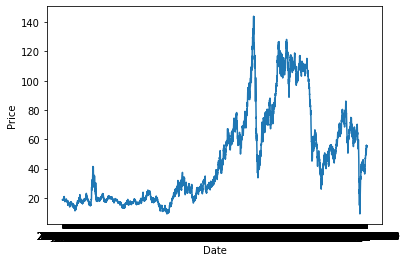

In [68]:
sns.lineplot(data=brent, x='Date', y='Price')

In [70]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


In [39]:
brent['Date'] = pd.to_datetime(brent['Date'])

In [40]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8554 non-null   datetime64[ns]
 1   Price   8554 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.8 KB


In [41]:
brent.to_csv('./Def_Data/Brent_price.csv')

In [74]:
#tipos de barcos
fleet['ShipType Label'].unique()

array(['Total fleet', 'Oil tankers', 'Bulk carriers', 'General cargo',
       'Container ships', 'Other types of ships'], dtype=object)

In [75]:
ship_type = fleet.groupby(['Year','ShipType Label'])[['Dead weight tons in thousands', 'Number of ships']].sum()

KeyError: "Columns not found: 'Number of ships'"

In [99]:
ship_type

Dead weight tons in thousands  Number of ships
Year ShipType Label                                                      
1980 Bulk carriers                          5.000237e+06              0.0
     Container ships                        2.698399e+05              0.0
     General cargo                          3.050325e+06              0.0
     Oil tankers                            9.338713e+06              0.0
     Other types of ships                   7.678074e+05              0.0
...                                                  ...              ...
2020 Container ships                        7.567318e+06         151604.0
     General cargo                          2.146024e+06         543624.0
     Oil tankers                            1.660587e+07         320676.0
     Other types of ships                   6.422547e+06        1427851.0
     Total fleet                            5.678705e+07        2775623.0

[246 rows x 2 columns]

In [100]:
df_ship = pd.DataFrame(ship_type)
df_ship

Dead weight tons in thousands  Number of ships
Year ShipType Label                                                      
1980 Bulk carriers                          5.000237e+06              0.0
     Container ships                        2.698399e+05              0.0
     General cargo                          3.050325e+06              0.0
     Oil tankers                            9.338713e+06              0.0
     Other types of ships                   7.678074e+05              0.0
...                                                  ...              ...
2020 Container ships                        7.567318e+06         151604.0
     General cargo                          2.146024e+06         543624.0
     Oil tankers                            1.660587e+07         320676.0
     Other types of ships                   6.422547e+06        1427851.0
     Total fleet                            5.678705e+07        2775623.0

[246 rows x 2 columns]

<AxesSubplot:xlabel='Year', ylabel='Dead weight tons in thousands'>

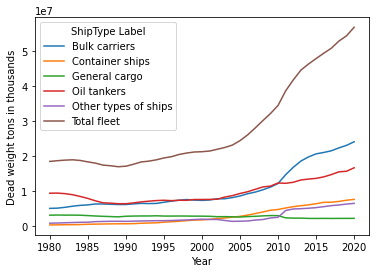

In [65]:
sns.lineplot(data=df_ship, x= 'Year', y= 'Dead weight tons in thousands', hue='ShipType Label')

In [102]:
df_ship.columns

Index(['Dead weight tons in thousands', 'Number of ships'], dtype='object')

In [88]:
port_calls = pd.read_csv('./Datasets/US_PortCalls.csv', sep= ',', header= None)

In [95]:
port_columns = port_calls.iloc[0,:]

In [96]:
port_calls = normalize_dataframe(port_calls, sep= ',')

In [99]:
len(port_columns)

25

In [108]:
port_calls = port_calls.iloc[:, :-1]

In [109]:
port_calls

0      Period     NaN   NaN NaN       NaN   NaN               NaN NaN  \
1     2018A00  "2018"  2018   A  "Annual"  0000           "World"  00   
2     2018A00  "2018"  2018   A  "Annual"  0000           "World"  01   
3     2018A00  "2018"  2018   A  "Annual"  0000           "World"  02   
4     2018A00  "2018"  2018   A  "Annual"  0000           "World"  03   
5     2018A00  "2018"  2018   A  "Annual"  0000           "World"  04   
...       ...     ...   ...  ..       ...   ...               ...  ..   
3632  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  04   
3633  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  05   
3634  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  06   
3635  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  07   
3636  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  08   

0                                    NaN     NaN  ...     NaN NaN    NaN NaN  \
1                            "All ships"    0.97  ...  234006      24210       
2                      "Passenger ships"          ...  228081                  
3                 "Liquid bulk carriers"    0.94  ...  234006      27014       
4                      "Container ships"     0.7  ...  217673                  
5               "Dry breakbulk carriers"    1.11  ...   91784       7384       
...                                  ...     ...  ...     ...  ..    ...  ..   
3632            "Dry breakbulk carriers"  1.5306  ...   71543       4591       
3633                 "Dry bulk carriers"  2.6528  ...   95086      46959       
3634           "Roll-on/ roll-off ships"          ...  100430       9966       
3635  "Liquefied petroleum gas carriers"  1.0618  ...   47342       7254       
3636    "Liquefied natural gas carriers"  1.3306  ...  168189      89995       

0        NaN NaN   NaN NaN    NaN NaN  
1     441561      3538      21413      
2                                      
3     441561                           
4                 3538      21413      
5     138743                           
...      ...  ..   ...  ..    ...  ..  
3632   55973                           
3633  182307                           
3634   55828                           
3635   54561                           
3636  156000                           

[3636 rows x 25 columns]

In [110]:
port_calls.columns = port_columns
port_calls

0      Period Period Label  Year Frequency Frequency Label Economy  \
1     2018A00       "2018"  2018         A        "Annual"    0000   
2     2018A00       "2018"  2018         A        "Annual"    0000   
3     2018A00       "2018"  2018         A        "Annual"    0000   
4     2018A00       "2018"  2018         A        "Annual"    0000   
5     2018A00       "2018"  2018         A        "Annual"    0000   
...       ...          ...   ...       ...             ...     ...   
3632  2020A00       "2020"  2020         A        "Annual"     926   
3633  2020A00       "2020"  2020         A        "Annual"     926   
3634  2020A00       "2020"  2020         A        "Annual"     926   
3635  2020A00       "2020"  2020         A        "Annual"     926   
3636  2020A00       "2020"  2020         A        "Annual"     926   

0        Economy Label CommercialMarket              CommercialMarket Label  \
1              "World"               00                         "All ships"   
2              "World"               01                   "Passenger ships"   
3              "World"               02              "Liquid bulk carriers"   
4              "World"               03                   "Container ships"   
5              "World"               04            "Dry breakbulk carriers"   
...                ...              ...                                 ...   
3632  "United Kingdom"               04            "Dry breakbulk carriers"   
3633  "United Kingdom"               05                 "Dry bulk carriers"   
3634  "United Kingdom"               06           "Roll-on/ roll-off ships"   
3635  "United Kingdom"               07  "Liquefied petroleum gas carriers"   
3636  "United Kingdom"               08    "Liquefied natural gas carriers"   

0    Median time in port (days)   ... Maximum size (GT) of vessels  \
1                           0.97  ...                       234006   
2                                 ...                       228081   
3                           0.94  ...                       234006   
4                            0.7  ...                       217673   
5                           1.11  ...                        91784   
...                          ...  ...                          ...   
3632                      1.5306  ...                        71543   
3633                      2.6528  ...                        95086   
3634                              ...                       100430   
3635                      1.0618  ...                        47342   
3636                      1.3306  ...                       168189   

0    Maximum size (GT) of vessels Footnote  \
1                                            
2                                            
3                                            
4                                            
5                                            
...                                    ...   
3632                                         
3633                                         
3634                                         
3635                                         
3636                                         

0    Average cargo carrying capacity (dwt) per vessel  \
1                                               24210   
2                                                       
3                                               27014   
4                                                       
5                                                7384   
...                                               ...   
3632                                             4591   
3633                                            46959   
3634                                             9966   
3635                                             7254   
3636                                            89995   

0    Average cargo carrying capacity (dwt) per vessel Footnote  \
1                                                                

In [131]:
port_calls_world = port_calls[port_calls['Economy Label'] == '"World"']
port_calls_world

0      Period Period Label  Year Frequency Frequency Label Economy  \
1     2018A00       "2018"  2018         A        "Annual"    0000   
2     2018A00       "2018"  2018         A        "Annual"    0000   
3     2018A00       "2018"  2018         A        "Annual"    0000   
4     2018A00       "2018"  2018         A        "Annual"    0000   
5     2018A00       "2018"  2018         A        "Annual"    0000   
6     2018A00       "2018"  2018         A        "Annual"    0000   
7     2018A00       "2018"  2018         A        "Annual"    0000   
8     2018A00       "2018"  2018         A        "Annual"    0000   
9     2018A00       "2018"  2018         A        "Annual"    0000   
1221  2019A00       "2019"  2019         A        "Annual"    0000   
1222  2019A00       "2019"  2019         A        "Annual"    0000   
1223  2019A00       "2019"  2019         A        "Annual"    0000   
1224  2019A00       "2019"  2019         A        "Annual"    0000   
1225  2019A00       "2019"  2019         A        "Annual"    0000   
1226  2019A00       "2019"  2019         A        "Annual"    0000   
1227  2019A00       "2019"  2019         A        "Annual"    0000   
1228  2019A00       "2019"  2019         A        "Annual"    0000   
1229  2019A00       "2019"  2019         A        "Annual"    0000   
2447  2020A00       "2020"  2020         A        "Annual"    0000   
2448  2020A00       "2020"  2020         A        "Annual"    0000   
2449  2020A00       "2020"  2020         A        "Annual"    0000   
2450  2020A00       "2020"  2020         A        "Annual"    0000   
2451  2020A00       "2020"  2020         A        "Annual"    0000   
2452  2020A00       "2020"  2020         A        "Annual"    0000   
2453  2020A00       "2020"  2020         A        "Annual"    0000   
2454  2020A00       "2020"  2020         A        "Annual"    0000   
2455  2020A00       "2020"  2020         A        "Annual"    0000   

0    Economy Label CommercialMarket              CommercialMarket Label  \
1          "World"               00                         "All ships"   
2          "World"               01                   "Passenger ships"   
3          "World"               02              "Liquid bulk carriers"   
4          "World"               03                   "Container ships"   
5          "World"               04            "Dry breakbulk carriers"   
6          "World"               05                 "Dry bulk carriers"   
7          "World"               06           "Roll-on/ roll-off ships"   
8          "World"               07  "Liquefied petroleum gas carriers"   
9          "World"               08    "Liquefied natural gas carriers"   
1221       "World"               00                         "All ships"   
1222       "World"               01                   "Passenger ships"   
1223       "World"               02              "Liquid bulk carriers"   
1224       "World"               03                   "Container ships"   
1225       "World"               04            "Dry breakbulk carriers"   
1226       "World"               05                 "Dry bulk carriers"   
1227       "World"               06           "Roll-on/ roll-off ships"   
1228       "World"               07  "Liquefied petroleum gas carriers"   
1229       "World"               08    "Liquefied natural gas carriers"   
2447       "World"               00                         "All ships"   
2448       "World"               01                   "Passenger ships"   
2449       "World"               02              "Liquid bulk carriers"   
2450       "World"               03                   "Container ships"   
2451       "World"               04            "Dry breakbulk carriers"   
2452       "World"               05                 "Dry bulk carriers"   
2453       "World"               06           "Roll-on/ roll-off ships"   
2454       "World"               07  "Liquefied petroleum gas carriers"   
2455       "Wo

In [132]:
port_calls_world.columns

Index(['Period', 'Period Label', 'Year', 'Frequency', 'Frequency Label',
       'Economy', 'Economy Label', 'CommercialMarket',
       'CommercialMarket Label', 'Median time in port (days) ',
       'Median time in port (days)  Footnote', 'Average age of vessels',
       'Average age of vessels Footnote', 'Average size (GT) of vessels',
       'Average size (GT) of vessels Footnote', 'Maximum size (GT) of vessels',
       'Maximum size (GT) of vessels Footnote',
       'Average cargo carrying capacity (dwt) per vessel',
       'Average cargo carrying capacity (dwt) per vessel Footnote',
       'Maximum cargo carrying capacity (dwt) of vessels',
       'Maximum cargo carrying capacity (dwt) of vessels Footnote',
       'Average container carrying capacity (TEU) per container ship',
       'Average container carrying capacity (TEU) per container ship Footnote',
       'Maximum container carrying capacity (TEU) of container ships',
       'Maximum container carrying capacity (TEU) of cont

In [137]:
port_arrivals = pd.read_csv('./Datasets/US_PortCallsArrivals.csv', sep= ',', header= None)

In [138]:
port_arrivals

0             1     2   \
0                                                Period  Period Label  Year   
1     2018A00,"2018",2018,A,"Annual",0000,"World",00...           NaN   NaN   
2     2018A00,"2018",2018,A,"Annual",0000,"World",01...           NaN   NaN   
3     2018A00,"2018",2018,A,"Annual",0000,"World",02...           NaN   NaN   
4     2018A00,"2018",2018,A,"Annual",0000,"World",03...           NaN   NaN   
...                                                 ...           ...   ...   
8723  2020A00,"2020",2020,A,"Annual",926,"United Kin...           NaN   NaN   
8724  2020A00,"2020",2020,A,"Annual",926,"United Kin...           NaN   NaN   
8725  2020A00,"2020",2020,A,"Annual",926,"United Kin...           NaN   NaN   
8726  2020A00,"2020",2020,A,"Annual",926,"United Kin...           NaN   NaN   
8727  2020A00,"2020",2020,A,"Annual",926,"United Kin...           NaN   NaN   

             3                4        5              6                 7   \
0     Frequency  Frequency Label  Economy  Economy Label  CommercialMarket   
1           NaN              NaN      NaN            NaN               NaN   
2           NaN              NaN      NaN            NaN               NaN   
3           NaN              NaN      NaN            NaN               NaN   
4           NaN              NaN      NaN            NaN               NaN   
...         ...              ...      ...            ...               ...   
8723        NaN              NaN      NaN            NaN               NaN   
8724        NaN              NaN      NaN            NaN               NaN   
8725        NaN              NaN      NaN            NaN               NaN   
8726        NaN              NaN      NaN            NaN               NaN   
8727        NaN              NaN      NaN            NaN               NaN   

                          8                     9   \
0     CommercialMarket Label  Number of port calls   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
8723                     NaN                   NaN   
8724                     NaN                   NaN   
8725                     NaN                   NaN   
8726                     NaN                   NaN   
8727                     NaN                   NaN   

                                 10  
0     Number of port calls Footnote  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
...                             ...  
8723                            NaN  
8724                            NaN  
8725                            NaN  
8726                            NaN  
8727                            NaN  

[8728 rows x 11 columns]

In [139]:
port_arr_cols = port_arrivals.iloc[0, :]

In [140]:
port_arrivals = normalize_dataframe(port_arrivals, sep= ',')

In [141]:
port_arrivals

0      Period     NaN   NaN NaN       NaN   NaN               NaN NaN  \
1     2018A00  "2018"  2018   A  "Annual"  0000           "World"  00   
2     2018A00  "2018"  2018   A  "Annual"  0000           "World"  01   
3     2018A00  "2018"  2018   A  "Annual"  0000           "World"  02   
4     2018A00  "2018"  2018   A  "Annual"  0000           "World"  03   
5     2018A00  "2018"  2018   A  "Annual"  0000           "World"  04   
...       ...     ...   ...  ..       ...   ...               ...  ..   
8723  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  04   
8724  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  05   
8725  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  06   
8726  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  07   
8727  2020A00  "2020"  2020   A  "Annual"   926  "United Kingdom"  08   

0                                    NaN      NaN NaN   NaN  
1                            "All ships"  4112944      None  
2                      "Passenger ships"  2227407      None  
3                 "Liquid bulk carriers"   494120      None  
4                      "Container ships"   454016      None  
5               "Dry breakbulk carriers"   430344      None  
...                                  ...      ...  ..   ...  
8723            "Dry breakbulk carriers"    15570      None  
8724                 "Dry bulk carriers"     1687      None  
8725           "Roll-on/ roll-off ships"    15290      None  
8726  "Liquefied petroleum gas carriers"     1641      None  
8727    "Liquefied natural gas carriers"      206      None  

[8727 rows x 12 columns]

In [142]:
port_arrivals = port_arrivals.iloc[:, :-1]

In [143]:
port_arrivals.columns = port_arr_cols

In [144]:
port_arrivals

0      Period Period Label  Year Frequency Frequency Label Economy  \
1     2018A00       "2018"  2018         A        "Annual"    0000   
2     2018A00       "2018"  2018         A        "Annual"    0000   
3     2018A00       "2018"  2018         A        "Annual"    0000   
4     2018A00       "2018"  2018         A        "Annual"    0000   
5     2018A00       "2018"  2018         A        "Annual"    0000   
...       ...          ...   ...       ...             ...     ...   
8723  2020A00       "2020"  2020         A        "Annual"     926   
8724  2020A00       "2020"  2020         A        "Annual"     926   
8725  2020A00       "2020"  2020         A        "Annual"     926   
8726  2020A00       "2020"  2020         A        "Annual"     926   
8727  2020A00       "2020"  2020         A        "Annual"     926   

0        Economy Label CommercialMarket              CommercialMarket Label  \
1              "World"               00                         "All ships"   
2              "World"               01                   "Passenger ships"   
3              "World"               02              "Liquid bulk carriers"   
4              "World"               03                   "Container ships"   
5              "World"               04            "Dry breakbulk carriers"   
...                ...              ...                                 ...   
8723  "United Kingdom"               04            "Dry breakbulk carriers"   
8724  "United Kingdom"               05                 "Dry bulk carriers"   
8725  "United Kingdom"               06           "Roll-on/ roll-off ships"   
8726  "United Kingdom"               07  "Liquefied petroleum gas carriers"   
8727  "United Kingdom"               08    "Liquefied natural gas carriers"   

0    Number of port calls Number of port calls Footnote  
1                 4112944                                
2                 2227407                                
3                  494120                                
4                  454016                                
5                  430344                                
...                   ...                           ...  
8723                15570                                
8724                 1687                                
8725                15290                                
8726                 1641                                
8727                  206                                

[8727 rows x 11 columns]

In [145]:
world_port_call_arrivals = port_arrivals[port_arrivals['Economy Label'] == '"World"']

In [146]:
world_port_call_arrivals

0      Period Period Label  Year Frequency Frequency Label Economy  \
1     2018A00       "2018"  2018         A        "Annual"    0000   
2     2018A00       "2018"  2018         A        "Annual"    0000   
3     2018A00       "2018"  2018         A        "Annual"    0000   
4     2018A00       "2018"  2018         A        "Annual"    0000   
5     2018A00       "2018"  2018         A        "Annual"    0000   
6     2018A00       "2018"  2018         A        "Annual"    0000   
7     2018A00       "2018"  2018         A        "Annual"    0000   
8     2018A00       "2018"  2018         A        "Annual"    0000   
9     2018A00       "2018"  2018         A        "Annual"    0000   
2922  2019A00       "2019"  2019         A        "Annual"    0000   
2923  2019A00       "2019"  2019         A        "Annual"    0000   
2924  2019A00       "2019"  2019         A        "Annual"    0000   
2925  2019A00       "2019"  2019         A        "Annual"    0000   
2926  2019A00       "2019"  2019         A        "Annual"    0000   
2927  2019A00       "2019"  2019         A        "Annual"    0000   
2928  2019A00       "2019"  2019         A        "Annual"    0000   
2929  2019A00       "2019"  2019         A        "Annual"    0000   
2930  2019A00       "2019"  2019         A        "Annual"    0000   
5845  2020A00       "2020"  2020         A        "Annual"    0000   
5846  2020A00       "2020"  2020         A        "Annual"    0000   
5847  2020A00       "2020"  2020         A        "Annual"    0000   
5848  2020A00       "2020"  2020         A        "Annual"    0000   
5849  2020A00       "2020"  2020         A        "Annual"    0000   
5850  2020A00       "2020"  2020         A        "Annual"    0000   
5851  2020A00       "2020"  2020         A        "Annual"    0000   
5852  2020A00       "2020"  2020         A        "Annual"    0000   
5853  2020A00       "2020"  2020         A        "Annual"    0000   

0    Economy Label CommercialMarket              CommercialMarket Label  \
1          "World"               00                         "All ships"   
2          "World"               01                   "Passenger ships"   
3          "World"               02              "Liquid bulk carriers"   
4          "World"               03                   "Container ships"   
5          "World"               04            "Dry breakbulk carriers"   
6          "World"               05                 "Dry bulk carriers"   
7          "World"               06           "Roll-on/ roll-off ships"   
8          "World"               07  "Liquefied petroleum gas carriers"   
9          "World"               08    "Liquefied natural gas carriers"   
2922       "World"               00                         "All ships"   
2923       "World"               01                   "Passenger ships"   
2924       "World"               02              "Liquid bulk carriers"   
2925       "World"               03                   "Container ships"   
2926       "World"               04            "Dry breakbulk carriers"   
2927       "World"               05                 "Dry bulk carriers"   
2928       "World"               06           "Roll-on/ roll-off ships"   
2929       "World"               07  "Liquefied petroleum gas carriers"   
2930       "World"               08    "Liquefied natural gas carriers"   
5845       "World"               00                         "All ships"   
5846       "World"               01                   "Passenger ships"   
5847       "World"               02              "Liquid bulk carriers"   
5848       "World"               03                   "Container ships"   
5849       "World"               04            "Dry breakbulk carriers"   
5850       "World"               05                 "Dry bulk carriers"   
5851       "World"               06           "Roll-on/ roll-off ships"   
5852       "World"               07  "Liquefied petroleum gas carriers"   
5853       "Wo

In [148]:
world_port_call_arrivals = world_port_call_arrivals.drop(world_port_call_arrivals[['Period','Period Label', 'Economy','CommercialMarket', 'Number of port calls Footnote', 'Frequency Label']], axis=1)

In [149]:
world_port_call_arrivals

0     Year Frequency Economy Label              CommercialMarket Label  \
1     2018         A       "World"                         "All ships"   
2     2018         A       "World"                   "Passenger ships"   
3     2018         A       "World"              "Liquid bulk carriers"   
4     2018         A       "World"                   "Container ships"   
5     2018         A       "World"            "Dry breakbulk carriers"   
6     2018         A       "World"                 "Dry bulk carriers"   
7     2018         A       "World"           "Roll-on/ roll-off ships"   
8     2018         A       "World"  "Liquefied petroleum gas carriers"   
9     2018         A       "World"    "Liquefied natural gas carriers"   
2922  2019         A       "World"                         "All ships"   
2923  2019         A       "World"                   "Passenger ships"   
2924  2019         A       "World"              "Liquid bulk carriers"   
2925  2019         A       "World"                   "Container ships"   
2926  2019         A       "World"            "Dry breakbulk carriers"   
2927  2019         A       "World"                 "Dry bulk carriers"   
2928  2019         A       "World"           "Roll-on/ roll-off ships"   
2929  2019         A       "World"  "Liquefied petroleum gas carriers"   
2930  2019         A       "World"    "Liquefied natural gas carriers"   
5845  2020         A       "World"                         "All ships"   
5846  2020         A       "World"                   "Passenger ships"   
5847  2020         A       "World"              "Liquid bulk carriers"   
5848  2020         A       "World"                   "Container ships"   
5849  2020         A       "World"            "Dry breakbulk carriers"   
5850  2020         A       "World"                 "Dry bulk carriers"   
5851  2020         A       "World"           "Roll-on/ roll-off ships"   
5852  2020         A       "World"  "Liquefied petroleum gas carriers"   
5853  2020         A       "World"    "Liquefied natural gas carriers"   

0    Number of port calls  
1                 4112944  
2                 2227407  
3                  494120  
4                  454016  
5                  430344  
6                  259551  
7                  187532  
8                   49357  
9                   10617  
2922              4362737  
2923              2378937  
2924               526202  
2925               474553  
2926               446817  
2927               277872  
2928               190907  
2929                55227  
2930                12222  
5845              3906987  
5846              2047156  
5847               488876  
5848               459417  
5849               413961  
5850               266337  
5851               166215  
5852                52639  
5853                12386

In [151]:
world_port_call_arrivals.to_csv('./Cleaned_Data/cleaned_port_calls.csv')